In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [24]:
PCA = pd.read_csv('phenotype_matrix.csv')

PCA.head()

,player,year,ott_PC1,long_PC1,short_PC1,arg_PC1,putt_PC1
0,Aaron Baddeley,2015,-0.509809,0.388889,0.693153,0.927282,-1.499516
1,Adam Hadwin,2015,-1.046071,-0.534898,1.552791,-0.308450,0.336628
2,Adam Scott,2015,0.389144,0.032519,-0.544679,-1.269520,1.392535
3,Alex Cejka,2015,-1.455240,0.247533,-0.507440,0.642349,1.072798
4,Alex Prugh,2015,0.166195,0.003552,-0.363583,-1.285360,1.479197


In [25]:
PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player     2058 non-null   object 
 1   year       2058 non-null   int64  
 2   ott_PC1    2058 non-null   float64
 3   long_PC1   2058 non-null   float64
 4   short_PC1  2058 non-null   float64
 5   arg_PC1    2058 non-null   float64
 6   putt_PC1   2058 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 112.7+ KB


In [26]:
key_cols = ['year', 'player']

# X = PCA[["ott_ratio","app_ratio","arg_ratio","putt_ratio","driving_dist","driving_acc","gir"]]
X = PCA.drop(columns=key_cols)

scaler = StandardScaler()
Xz = X

In [27]:
k_min, k_max = 2, 8
ks, inertias, sils = [], [], []
best_k, best_sil = None, -1

for k in range(k_min, k_max + 1):
    km = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = km.fit_predict(Xz)
    
    if len(np.unique(labels)) < 2 or min((labels == c).sum() for c in np.unique(labels)) < 2:
        sil = -1.0
    else:
        sil = silhouette_score(Xz, labels)
        
    ks.append(k)
    inertias.append(km.inertia_)
    sils.append(sil)
    if sil > best_sil:
        best_k, best_sil = k, sil
        
best_k, best_sil

(2, 0.27212625830777615)

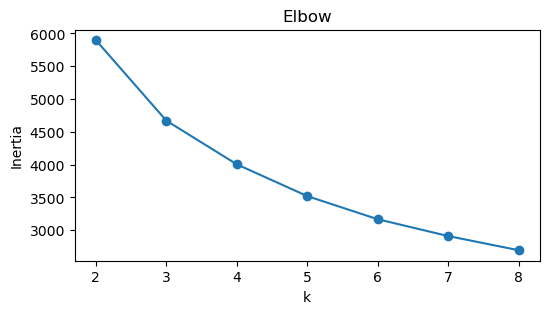

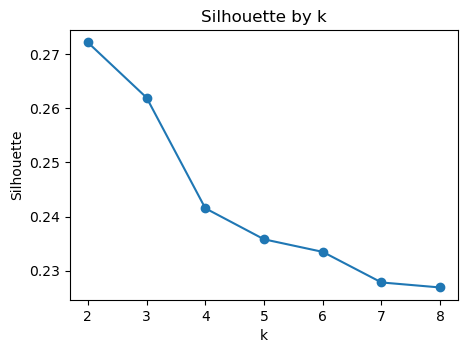

   k  silhouette
0  2    0.272126
1  3    0.261940
2  4    0.241538
3  5    0.235813
4  6    0.233493
5  7    0.227853
6  8    0.226927


In [28]:
plt.figure(figsize=(6,3))
plt.plot(ks, inertias, marker="o")
plt.xlabel("k"); plt.ylabel("Inertia"); plt.title("Elbow")
plt.show()

plt.figure(figsize=(5,3.5))
plt.plot(ks, sils, marker="o")
plt.xlabel("k"); plt.ylabel("Silhouette"); plt.title("Silhouette by k")
plt.show()

sil_df = pd.DataFrame({
    "k": ks,
    "silhouette": sils
})
print(sil_df)

In [29]:
km = KMeans(n_clusters=4, n_init=10, random_state=0)
labels = km.fit_predict(Xz)

clusters_df = PCA.copy()
clusters_df["cluster"] = labels
clusters_df["cluster"].value_counts().sort_index()

cluster
0    518
1    551
2    459
3    530
Name: count, dtype: int64

In [30]:
clusters_df["cluster"] = labels
cluster_means = clusters_df.groupby("cluster")[X.columns].mean().round(2)
print(cluster_means)

         ott_PC1  long_PC1  short_PC1  arg_PC1  putt_PC1
cluster                                                 
0           0.29      0.13       0.63    -1.25      0.19
1          -0.75      0.86       0.13     0.43     -0.68
2           0.10     -0.54      -0.45    -0.31      1.20
3           0.45     -0.64      -0.38     1.06     -0.49


In [31]:
clusters_df

,player,year,ott_PC1,long_PC1,short_PC1,arg_PC1,putt_PC1,cluster
0,Aaron Baddeley,2015,-0.509809,0.388889,0.693153,0.927282,-1.499516,1
1,Adam Hadwin,2015,-1.046071,-0.534898,1.552791,-0.308450,0.336628,0
2,Adam Scott,2015,0.389144,0.032519,-0.544679,-1.269520,1.392535,2
3,Alex Cejka,2015,-1.455240,0.247533,-0.507440,0.642349,1.072798,2
4,Alex Prugh,2015,0.166195,0.003552,-0.363583,-1.285360,1.479197,2
...,...,...,...,...,...,...,...,...
2053,Will Gordon,2025,0.543071,-1.261944,0.343718,-0.793253,1.168409,2
2054,William Mouw,2025,0.810318,-1.551842,0.700027,0.492061,-0.450564,3
2055,Wyndham Clark,2025,0.851338,-0.034566,0.630987,0.232122,-1.679882,3
2056,Xander Schauffele,2025,1.423608,-1.073550,-0.277317,-0.645172,0.572432,2


In [32]:
clusters_df[clusters_df.player.isin(['Bryson DeChambeau', 'Tommy Fleetwood', 'Xander Schauffele', 'Rory McIlroy', 'Scottie Scheffler']) & (clusters_df.year == 2021)]

,player,year,ott_PC1,long_PC1,short_PC1,arg_PC1,putt_PC1,cluster
1159,Bryson DeChambeau,2021,1.571992,-1.001989,0.214265,-0.099380,-0.684888,3
1279,Rory McIlroy,2021,1.689263,-0.381081,-0.437806,0.028880,-0.899256,3
1293,Scottie Scheffler,2021,1.401315,0.134079,0.282687,-0.531075,-1.287006,0
1309,Tommy Fleetwood,2021,0.098171,1.526348,-1.031967,-0.754593,0.162040,1
1322,Xander Schauffele,2021,0.913869,-0.653504,-0.273345,1.160391,-1.147411,3


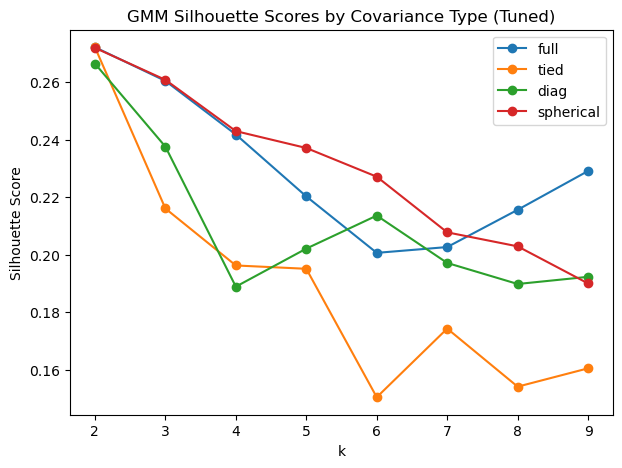


full covariance:
  k=2: silhouette=0.2721
  k=3: silhouette=0.2604
  k=4: silhouette=0.2417
  k=5: silhouette=0.2202
  k=6: silhouette=0.2006
  k=7: silhouette=0.2026
  k=8: silhouette=0.2155
  k=9: silhouette=0.2291

tied covariance:
  k=2: silhouette=0.2721
  k=3: silhouette=0.2160
  k=4: silhouette=0.1962
  k=5: silhouette=0.1950
  k=6: silhouette=0.1504
  k=7: silhouette=0.1742
  k=8: silhouette=0.1540
  k=9: silhouette=0.1604

diag covariance:
  k=2: silhouette=0.2664
  k=3: silhouette=0.2375
  k=4: silhouette=0.1888
  k=5: silhouette=0.2021
  k=6: silhouette=0.2135
  k=7: silhouette=0.1971
  k=8: silhouette=0.1897
  k=9: silhouette=0.1922

spherical covariance:
  k=2: silhouette=0.2719
  k=3: silhouette=0.2608
  k=4: silhouette=0.2429
  k=5: silhouette=0.2370
  k=6: silhouette=0.2271
  k=7: silhouette=0.2077
  k=8: silhouette=0.2028
  k=9: silhouette=0.1899


In [33]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

cov_types = ["full", "tied", "diag", "spherical"]

plt.figure(figsize=(7,5))

all_sils = {}

for cov in cov_types:
    sils = []
    for k in range(2, 10):
        gmm = GaussianMixture(
            n_components=k,
            covariance_type=cov,
            n_init=50,
            max_iter=50,
            init_params="kmeans",
            reg_covar=1e-3,
            random_state=0
        )
        labels = gmm.fit_predict(Xz)
        sils.append(silhouette_score(Xz, labels))
    all_sils[cov] = sils
    plt.plot(range(2,10), sils, marker='o', label=cov)

plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("GMM Silhouette Scores by Covariance Type (Tuned)")
plt.legend()
plt.show()

for cov, sils in all_sils.items():
    print(f"\n{cov} covariance:")
    for k, s in zip(range(2,10), sils):
        print(f"  k={k}: silhouette={s:.4f}")

In [34]:
best_cov = "spherical"
best_k = 4

gmm = GaussianMixture(
    n_components=best_k,
    covariance_type=best_cov,
    n_init=50,
    max_iter=5000,
    init_params="kmeans",
    reg_covar=1e-3,
    random_state=0
)

gmm_labels = gmm.fit_predict(Xz)

In [35]:
gmm_clusters_df = PCA.copy()
gmm_clusters_df["gmm_cluster"] = gmm_labels

In [36]:
print(gmm_clusters_df["gmm_cluster"].value_counts().sort_index())

cluster_means = gmm_clusters_df.groupby("gmm_cluster")[X.columns].mean().round(2)
print(cluster_means)


gmm_cluster
0    450
1    724
2    460
3    424
Name: count, dtype: int64
             ott_PC1  long_PC1  short_PC1  arg_PC1  putt_PC1
gmm_cluster                                                 
0              -0.82      0.52      -0.31     1.02     -0.41
1               0.28     -0.35       0.00    -0.84      0.91
2               0.63     -0.81      -0.36     0.95     -0.41
3              -0.22      0.83       0.69    -0.63     -0.66


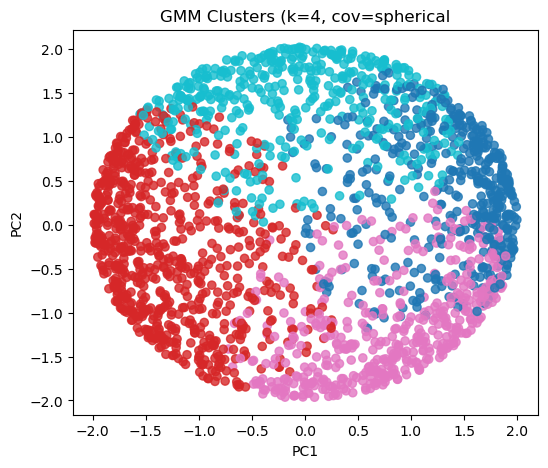

In [37]:
from sklearn.decomposition import PCA

viz_pca = PCA(n_components=2)
viz_2d = viz_pca.fit_transform(Xz)

plt.figure(figsize=(6,5))
plt.scatter(
    viz_2d[:,0], viz_2d[:,1],
    c=gmm_labels,
    cmap="tab10",
    s=35,
    alpha=0.8
)
plt.title(f"GMM Clusters (k={best_k}, cov=spherical")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [38]:
# target = gmm_clusters_df[
#     gmm_clusters_df.player.isin(["Rory McIlroy","Tommy Fleetwood","Xander Schauffele","Bryson DeChambeau"])
# ]
# print(target[["player","year","gmm_cluster"]])
# print(target[["player","year","gmm_cluster"]].drop_duplicates())

gmm_clusters_df[gmm_clusters_df.player.isin(['Bryson DeChambeau', 'Tommy Fleetwood', 'Xander Schauffele', 'Rory McIlroy', 'Scottie Scheffler']) & (gmm_clusters_df.year == 2021)]

,player,year,ott_PC1,long_PC1,short_PC1,arg_PC1,putt_PC1,gmm_cluster
1159,Bryson DeChambeau,2021,1.571992,-1.001989,0.214265,-0.099380,-0.684888,2
1279,Rory McIlroy,2021,1.689263,-0.381081,-0.437806,0.028880,-0.899256,2
1293,Scottie Scheffler,2021,1.401315,0.134079,0.282687,-0.531075,-1.287006,3
1309,Tommy Fleetwood,2021,0.098171,1.526348,-1.031967,-0.754593,0.162040,3
1322,Xander Schauffele,2021,0.913869,-0.653504,-0.273345,1.160391,-1.147411,2


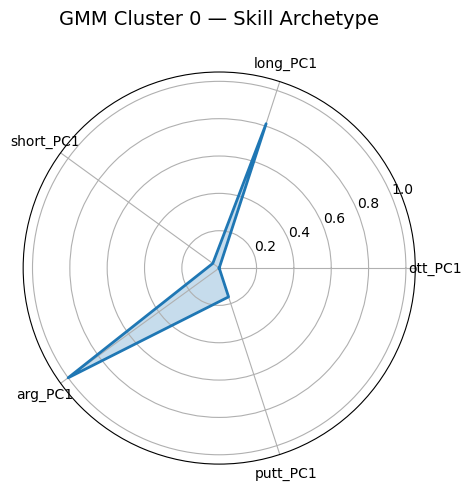

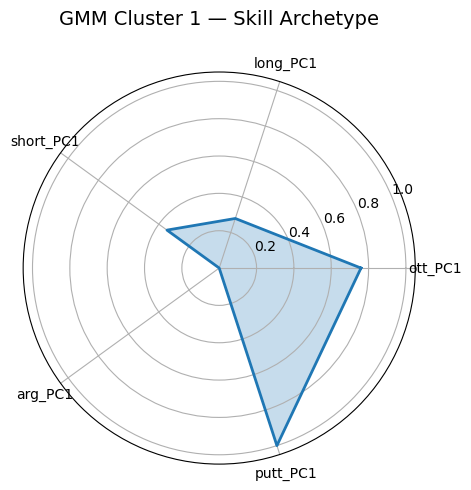

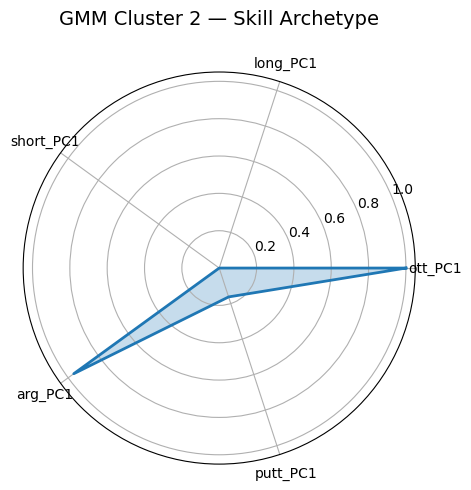

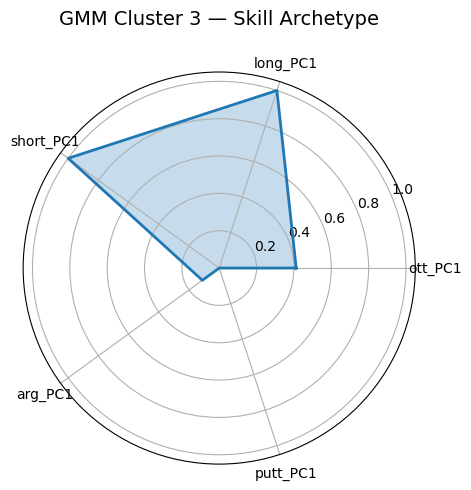

In [39]:
cluster_means = gmm_clusters_df.groupby("gmm_cluster")[X.columns].mean()

cluster_norm = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

def radar_plot(row, feature_labels, title):
    N = len(feature_labels)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]
    
    values = row.tolist()
    values += values[:1]

    fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(polar=True))
    
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(feature_labels, fontsize=10)

    ax.set_title(title, y=1.1, fontsize=14)
    plt.tight_layout()
    plt.show()

features = list(cluster_norm.columns)

for c in cluster_norm.index:
    radar_plot(
        cluster_norm.loc[c],
        feature_labels=features,
        title=f"GMM Cluster {c} — Skill Archetype"
    )


In [40]:
clusters_df.head()

,player,year,ott_PC1,long_PC1,short_PC1,arg_PC1,putt_PC1,cluster
0,Aaron Baddeley,2015,-0.509809,0.388889,0.693153,0.927282,-1.499516,1
1,Adam Hadwin,2015,-1.046071,-0.534898,1.552791,-0.308450,0.336628,0
2,Adam Scott,2015,0.389144,0.032519,-0.544679,-1.269520,1.392535,2
3,Alex Cejka,2015,-1.455240,0.247533,-0.507440,0.642349,1.072798,2
4,Alex Prugh,2015,0.166195,0.003552,-0.363583,-1.285360,1.479197,2


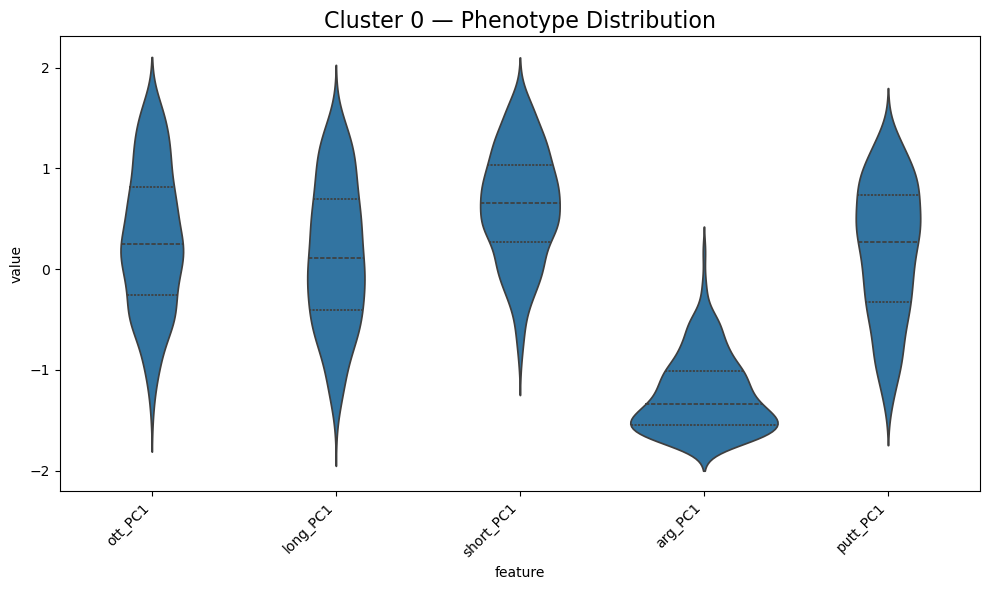

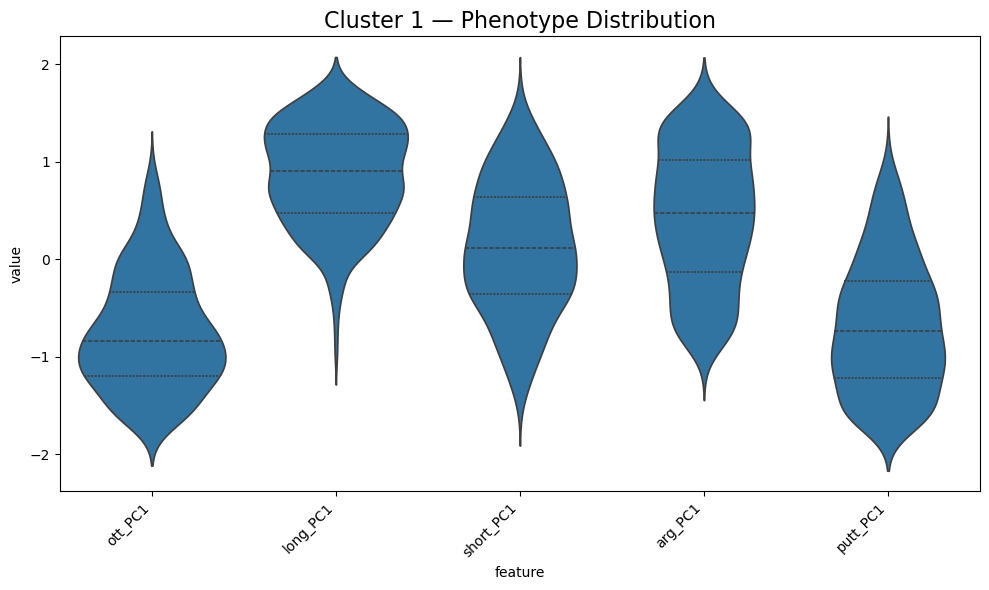

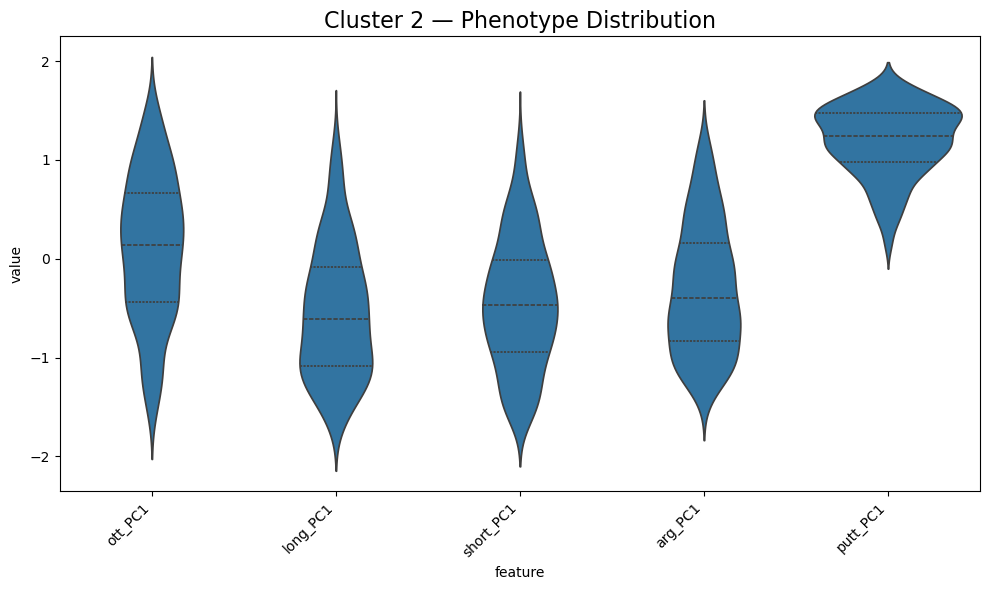

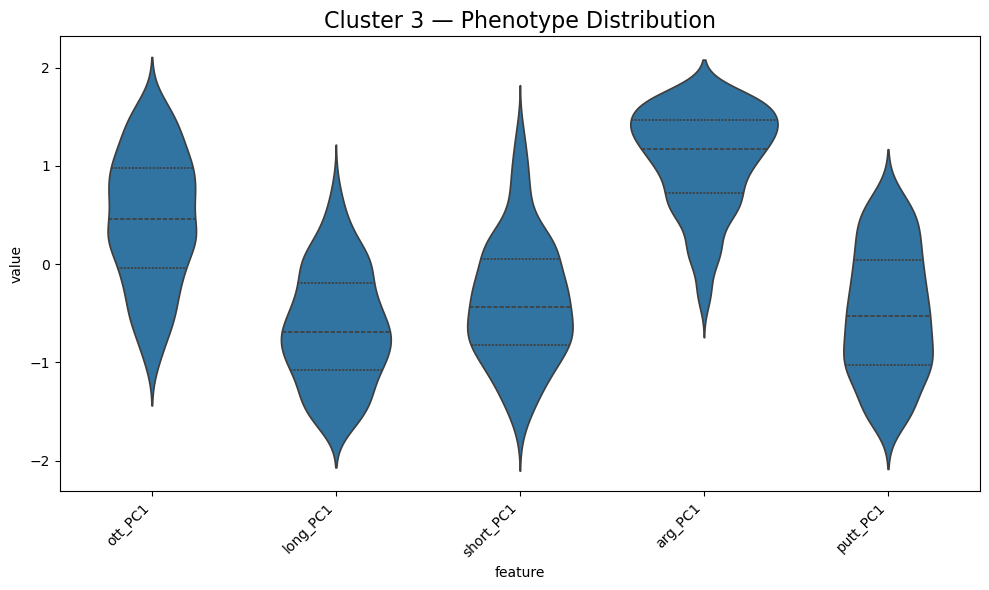

In [ ]:
features = [col for col in clusters_df.columns if "PC" in col]

clusters = sorted(clusters_df["cluster"].unique())

for cluster in clusters:
    subset = clusters_df[clusters_df["cluster"] == cluster]
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(
        data=subset[features].melt(var_name="feature", value_name="value"),
        x="feature",
        y="value",
        inner="quartile"
    )
    
    plt.title(f"Cluster {cluster} — Phenotype Distribution", fontsize=16)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

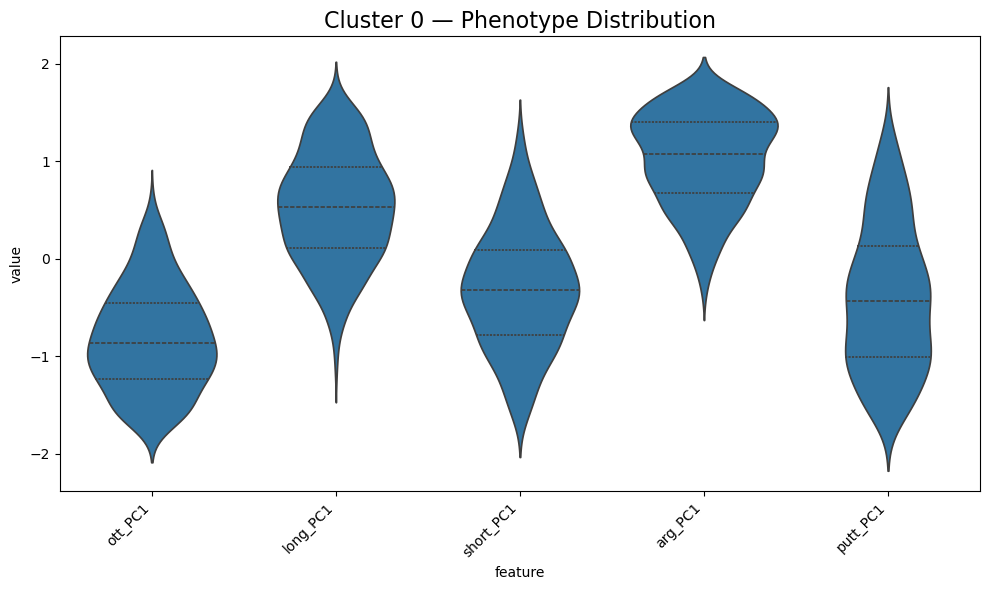

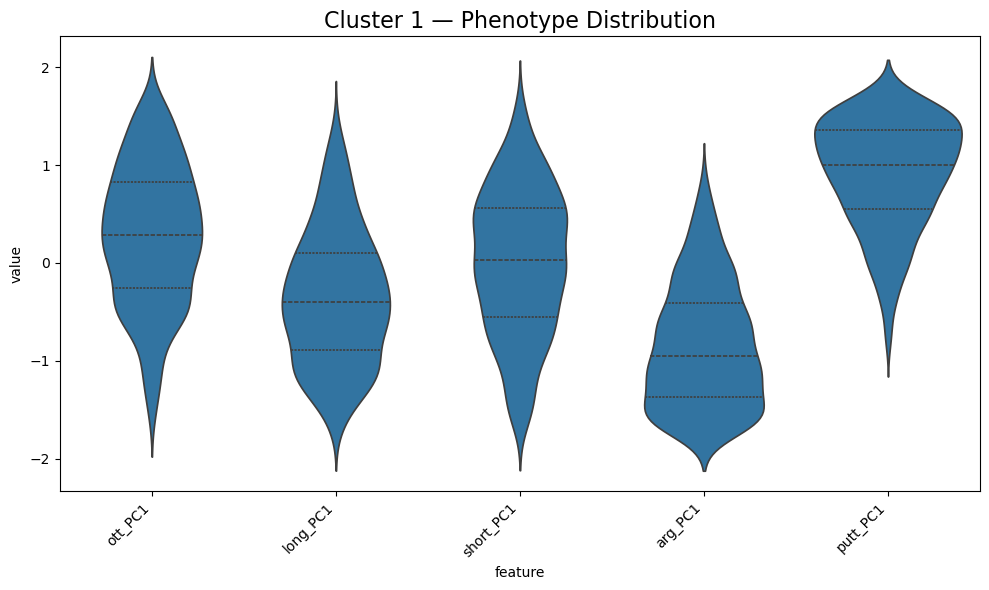

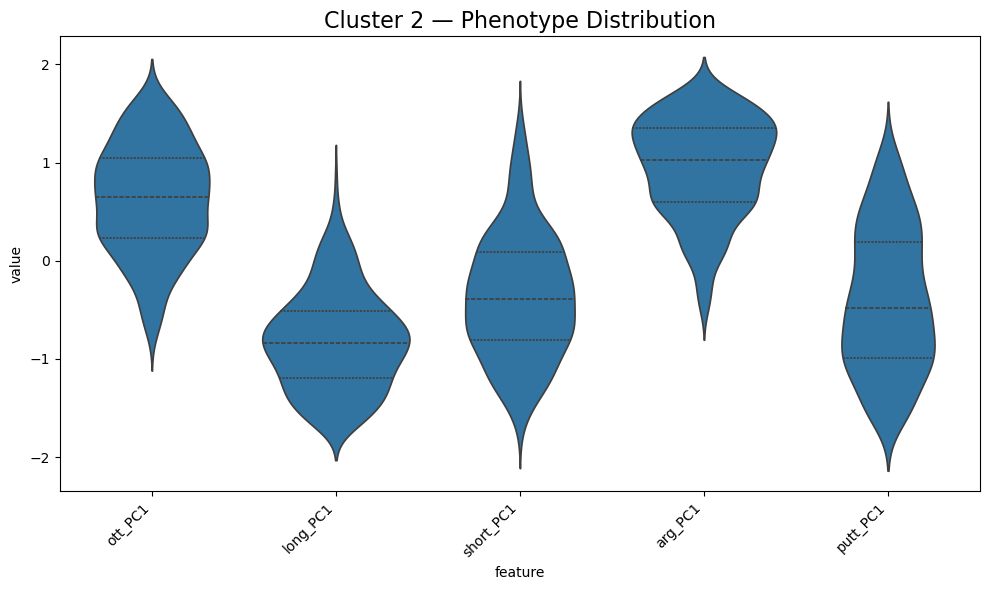

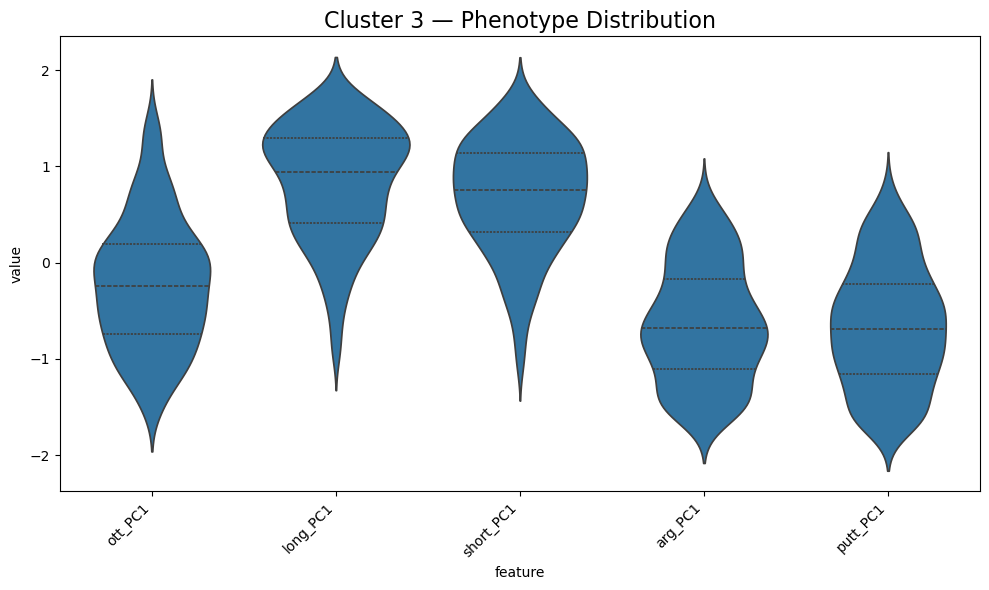

In [42]:
features = [col for col in gmm_clusters_df.columns if "PC" in col]

clusters = sorted(gmm_clusters_df["gmm_cluster"].unique())

for cluster in clusters:
    subset = gmm_clusters_df[gmm_clusters_df["gmm_cluster"] == cluster]
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(
        data=subset[features].melt(var_name="feature", value_name="value"),
        x="feature",
        y="value",
        inner="quartile"
    )
    
    plt.title(f"Cluster {cluster} — Phenotype Distribution", fontsize=16)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [43]:
gmm_clusters_df.to_csv("gmm_clusters.csv", index=False)